                         si10         t2m      wdir10         r2  latitude  \
valid_time                                                                   
2000-07-01 00:00:00  2.623460  289.204681  250.703400  88.884361  47.89917   
2000-07-01 06:00:00  2.871353  288.658325  203.195374  92.888412  47.89917   
2000-07-01 12:00:00  4.154931  293.973755  216.039597  75.777275  47.89917   
2000-07-01 18:00:00  4.594299  294.772217  238.953476  54.828125  47.89917   
2000-07-02 00:00:00  1.979007  287.414734  248.671875  94.449234  47.89917   
...                       ...         ...         ...        ...       ...   
2021-07-30 18:00:00  7.346303  293.767151  250.453506  56.076172  47.89917   
2021-07-31 00:00:00  2.169646  287.871521  289.179718  85.535156  47.89917   
2021-07-31 06:00:00  3.036371  287.018707  262.742676  93.421310  47.89917   
2021-07-31 12:00:00  3.266730  293.440918  256.085968  54.439453  47.89917   
2021-07-31 18:00:00  3.126098  291.344818  324.266266  72.238281

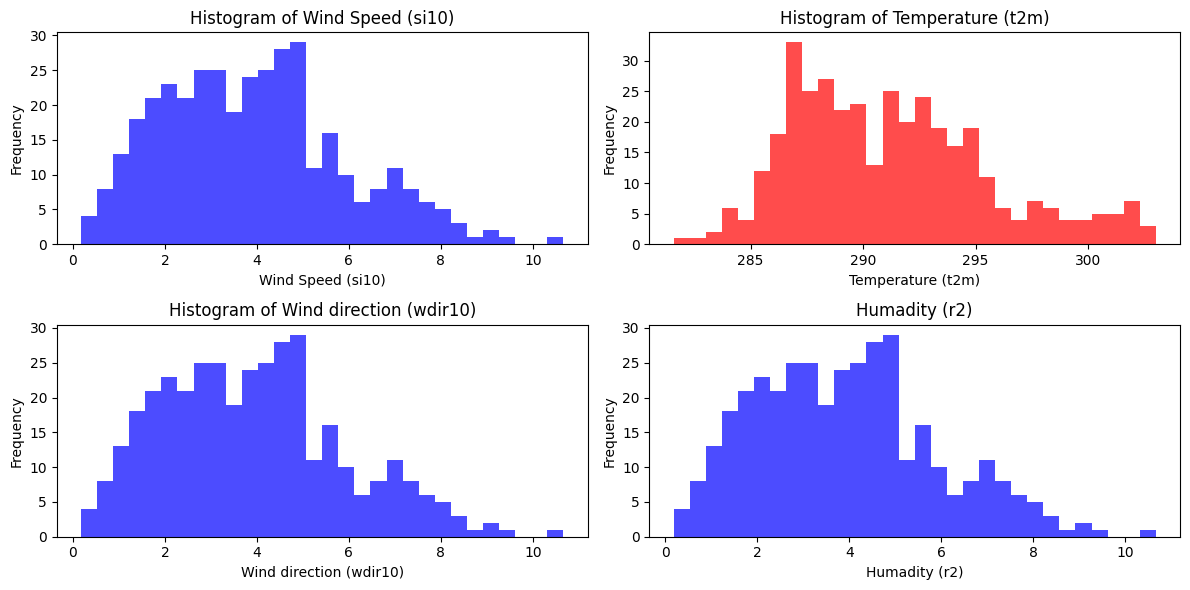

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define your function
def MyFunction(fileinput):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Coordinates of the center of the burned area
    burned_area_lat = 41.709377863541654
    burned_area_lon = 1.892273844304144

    # Calculate the nearest grid point indices
    abs_diff_lat = np.abs(ds.latitude[:,0].values - burned_area_lat)
    abs_diff_lon = np.abs(ds.longitude[0,:].values - burned_area_lon)

    # Find the index of the nearest grid point
    lat_idx = abs_diff_lat.argmin().item()
    lon_idx = abs_diff_lon.argmin().item()

    # Select data only for July
    july_data = ds.sel(valid_time=ds.valid_time.dt.month == 7)

    # Extract wind speed values for July at the nearest grid point
    july_wind_speed_at_point = july_data.isel(x=lon_idx, y=lat_idx)[['si10', 't2m', 'wdir10', 'r2']]
    
    # Convert to a pandas dataframe
    df = july_wind_speed_at_point.to_dataframe()
    
    return df

# List to store the dataframes from each file
df_all = []

# Assuming 'myallfiles' is a list of file paths
myallfiles = ['/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2000.nc', 
              '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2001.nc',
              # Add all other file paths
              '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2021.nc']  
              
# Loop through each file, process, and append the result
for file in myallfiles:
    df_all.append(MyFunction(file))

# Concatenate all the dataframes
dfba = pd.concat(df_all)

# Optional: View the concatenated dataframe
print(dfba)

# Plot histograms for wind speed ('si10') and temperature ('t2m')
plt.figure(figsize=(12, 6))

# Histogram for wind speed (si10)
plt.subplot(2, 2, 1)
plt.hist(dfba['si10'].dropna(), bins=30, color='b', alpha=0.7)
plt.title('Histogram of Wind Speed (si10)')
plt.xlabel('Wind Speed (si10)')
plt.ylabel('Frequency')

# Histogram for temperature (t2m)
plt.subplot(2, 2, 2)
plt.hist(dfba['t2m'].dropna(), bins=30, color='r', alpha=0.7)
plt.title('Histogram of Temperature (t2m)')
plt.xlabel('Temperature (t2m)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(dfba['si10'].dropna(), bins=30, color='b', alpha=0.7)
plt.title('Histogram of Wind direction (wdir10)')
plt.xlabel('Wind direction (wdir10)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(dfba['si10'].dropna(), bins=30, color='b', alpha=0.7)
plt.title('Humadity (r2)')
plt.xlabel('Humadity (r2)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()
